In [1]:
from new2D_Libraries import * 
from Tools_Libraries import TF1Integral

Let's condiser an arbitrary Recoil Energy spectrum 

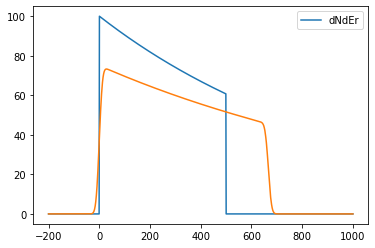

In [2]:
ermin = 0
ermax = 500
dNdEr = lambda er : (100*np.exp(-0.001*er) )* (er>=ermin) * (er<=ermax)
xmin,xmax,nptx = -200,1000,1000
x = np.linspace(xmin,xmax,nptx)
plt.plot(x,dNdEr(x),label='dNdEr')
_ = plt.legend()

args1D = dict(
    sigma_phonon = 10,
    Q = 1,
    V = 1,
    epsilon = 3,
    scale = 'eV',
    nsig = 5,
    npts = 1000)

f1Dsmeared = lambda Er :smeared1D_from_Er_spectrum(Er,dNdEr,**args1D)

plt.plot(x,f1Dsmeared(x),label='1D smeared')

Let's use Quentin's Integration function from 'Tools_Libraries' : TF1Integral(TF1=None,Emin=None,Emax=None,Nptx=1000)
to check if smeared1D_from_Er_spectrum() is accurate
Make sure that the smeared energy spectrum fits in the above plot, otherwise it is normal for the two integration values to be different

In [3]:
Integrale_Er = TF1Integral(dNdEr,xmin,xmax,3000)
print(f'Integrale_Er = {Integrale_Er:.2f}')
Integrale_1D = TF1Integral(f1Dsmeared,xmin,xmax,3000)
print(f'Integrale_1D = {Integrale_1D:.2f}')

Integrale_Er = 39362.29
Integrale_1D = 39345.65


time = 1.81 s to evaluate 2d pdf at 10000 different values


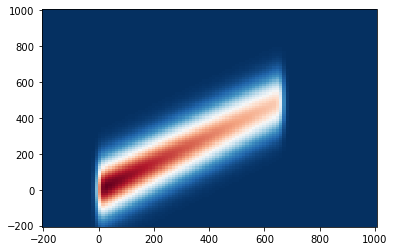

In [4]:
args2D = args1D.copy()
args2D ['sigma_ion'] = 100

points = 100
h = np.linspace(-200,1000,points)
i = np.linspace(-200,1000,points)
X,Y = np.meshgrid(h, i)

start = time.time()
Z = smeared2D_from_Er_spectrum(X,Y,dNdEr,**args2D)
end = time.time()
print(f"time = {end-start:.2f} s to evaluate 2d pdf at {points*points} different values")

_ = plt.pcolormesh(X,Y,Z,cmap='RdBu_r',shading='auto')
#plt.contourf(X,Y,Z,levels=30,cmap='RdBu_r')

#print(integrate.dblquad(f, -200, 1000, lambda x: 0, lambda x: 1)


Need to find a way of integrating in 2D to check that everything is properly normalized